# core

> Core functionality required for the libray.

In [ ]:
#|default_exp core

In [ ]:
#|hide
from nbdev.showdoc import *

In [ ]:
#|export
from fastai.vision.all import *
import polvo as pv

In [ ]:
data_dir = pv.mkdir('snacks', tmp=True, exist_ok=True, overwrite=True)
data_dir = pv.download_and_extract('https://github.com/lgvaz/polvo-datasets-hub/releases/download/snacks/snacks.zip', data_dir)
image_files = pv.get_image_files(data_dir)

  0%|          | 0/438252 [00:00<?, ?B/s]

In [ ]:
dss = Datasets(image_files, [[PILImage.create], [parent_label, Categorize]])

In [ ]:
after_item = [ToTensor(), Resize(300)]
after_batch = [IntToFloatTensor(), *aug_transforms(size=224, min_scale=0.75, max_rotate=150)]
dls = dss.dataloaders(4, after_item=after_item, after_batch=after_batch, num_workers=0)

In [ ]:
#|export
def one_batch_with_idxs(
    dl, # A `DataLoader` instance. Commonly `dls.train` or `dls.valid`
    unique_idx=None, # If specified, show only images with index `unique_idx`.
):
    "Show original and transformed version of images."
    old_get_idxs = dl.get_idxs

    idxs = dl.get_idxs() if unique_idx is None else [unique_idx] * len(dl.items)
    dl.get_idxs = lambda: idxs
    x, y = dl.one_batch()

    dl.get_idxs = old_get_idxs
    
    return (x, y), idxs

In [ ]:
#|export
@delegates(pv.image_grid)
def show_tfms(
    dl, # A `DataLoader` instance. Commonly `dls.train` or `dls.valid`
    unique_idx=None, # If specified, show only images with index `unique_idx`.
    max_n=5, # Maximum number of samples.
    pad=0.2,
    ncols=2,
    **kwargs,
):
    "Show original and transformed version of images."
    (xs, ys), idxs = one_batch_with_idxs(dl, unique_idx=unique_idx)
    
    shows = []
    xmax, ymax = 0, 0 # Has to be passed to show grid so images are not cut when displayed
    for i, x, idx in zip(range(max_n), xs, idxs):
        orig = dl.dataset[idx]
        image = orig[0]
        xmax = max(xmax, x.shape[2], image.shape[1])
        ymax = max(ymax, x.shape[1], image.shape[0])
        
        def _s(ax, orig=orig, idx=idx): return dl.dataset.show(orig, ctx=show_title(idx, ctx=ax))
        shows.append(_s)

    fig, grid = pv.get_image_grid(nrows=len(shows), ncols=ncols, pad=pad, **kwargs)
    
    dl.show_batch((xs, ys), ctxs=grid[1::2], show=True)
    pv.show_grid(grid[::2], shows, show=False)
    pv.normalize_axes(grid, xmax=xmax, ymax=ymax)
    
    return fig, grid

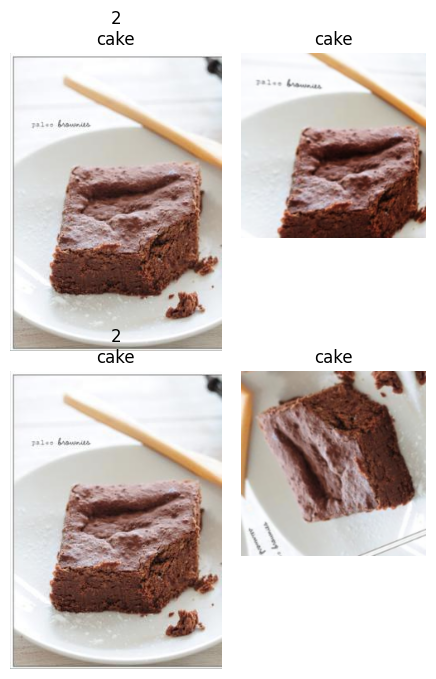

(<Figure size 1400x800 with 8 Axes>,
 <mpl_toolkits.axes_grid1.axes_grid.ImageGrid>)

In [ ]:
show_tfms(dls.train, unique_idx=2, max_n=2)

In [ ]:
#|hide
import nbdev; nbdev.nbdev_export()